# Predict and verify task completion times

In [78]:
import pandas as pd
import sys
import matplotlib.pyplot as plt    

In [2]:
# copied methods from klm.py script

def file_to_klm_string(filename):
    klm_string = ""
    try:
        file = open(filename)
    except IOError:
        return []
    lines = file.readlines()
    for line in lines:
        new_line = line.split("#", 1)[0].replace(" ","").rstrip().lower()
        klm_string += new_line
    return klm_string


# calculates task time
def calculate_klm_time(klm_model, klm_string):
    numbers = ""
    result = 0
    for char in klm_string:
        # save digits as prefixes for following operator
        if char.isdigit():
            numbers += char
        else:
            try:
                operator_number = klm_model[char]
            except KeyError:
                print(char, ' character does not match any klm operator. Check your klm file.')
                return
            # multiply by prefixed number if it exists
            if len(numbers) > 0:
                operator_number *= float(numbers)
                numbers = ""
            result += operator_number
    return result

In [3]:
klm_lit = {
            "k": 0.28,
            "p": 1.1,
            "h": 0.4,
            "b": 0.1,
            "m": 1.35,
            }
klm_own = {
            "k": 0.309,
            "b": 0.09,
            "h": 0.498,
            "p": 0.421,
            }

In [99]:
predictions_dict_own = {}
predictions_dict_own["test1"] = round(calculate_klm_time(klm_own, file_to_klm_string("klm1.txt")),3)
predictions_dict_own["test2"] = round(calculate_klm_time(klm_own, file_to_klm_string("klm2.txt")),3)
predictions_dict_own["test3"] = round(calculate_klm_time(klm_own, file_to_klm_string("klm3.txt")),3)
predictions_dict_own["test4"] = round(calculate_klm_time(klm_own, file_to_klm_string("klm4.txt")),3)

In [100]:
predictions_dict_own

{'test1': 30.651, 'test2': 15.759, 'test3': 8.414, 'test4': 4.326}

In [101]:
predictions_dict_lit = {}
predictions_dict_lit["test1"] = round(calculate_klm_time(klm_lit, file_to_klm_string("klm1.txt")),3)
predictions_dict_lit["test2"] = round(calculate_klm_time(klm_lit, file_to_klm_string("klm2.txt")),3)
predictions_dict_lit["test3"] = round(calculate_klm_time(klm_lit, file_to_klm_string("klm3.txt")),3)
predictions_dict_lit["test4"] = round(calculate_klm_time(klm_lit, file_to_klm_string("klm4.txt")),3)

In [102]:
predictions_dict_lit

{'test1': 66.3, 'test2': 14.28, 'test3': 18.2, 'test4': 3.92}

## Test results

In [103]:
time_mouse_1 = []
time_key_1 = []
time_mouse_2 = []
time_key_2 = []

for i in range (1, 5):  
    mouse_1 = pd.read_csv("test_data/test1_{num}.csv".format(num = i), names=["input","time"])
    key_1 = pd.read_csv("test_data/test2_{num}.csv".format(num = i), names=["input","time"])
    mouse_2 = pd.read_csv("test_data/test3_{num}.csv".format(num = i), names=["input","time"])
    key_2 = pd.read_csv("test_data/test4_{num}.csv".format(num = i), names=["input","time"])
    
    time_diff_mouse_1 = (list(mouse_1["time"])[-1]-list(mouse_1["time"])[0])
    time_diff_key_1 = (list(key_1["time"])[-1]-list(key_1["time"])[0])
    time_diff_mouse_2 = (list(mouse_2["time"])[-1]-list(mouse_2["time"])[0])
    time_diff_key_2 = (list(key_2["time"])[-1]-list(key_2["time"])[0])
    
    time_mouse_1.append(time_diff_mouse_1)
    time_key_1.append(time_diff_key_1)
    time_mouse_2.append(time_diff_mouse_2)
    time_key_2.append(time_diff_key_2)

time_mouse_1_result = round(sum(time_mouse_1)/len(time_mouse_1),3)
time_key_1_result = round(sum(time_key_1)/len(time_key_1),3)
time_mouse_2_result = round(sum(time_mouse_2)/len(time_mouse_2),3)
time_key_2_result = round(sum(time_key_2)/len(time_key_2),3)

time_key_2_result

6.709

In [109]:
results = [["1", time_mouse_1_result, predictions_dict_lit["test1"],predictions_dict_own["test1"]],
            ["2", time_key_1_result, predictions_dict_lit["test2"],predictions_dict_own["test2"]],
             ["3", time_mouse_2_result, predictions_dict_lit["test3"],predictions_dict_own["test3"]],
              ["4", time_key_2_result, predictions_dict_lit["test4"], predictions_dict_own["test4"]]]

df = pd.DataFrame(results, columns = ['Task','Tested','Estimated (Card et. al)','Estimated (own)'])
print(df)

  Task  Tested  Estimated (Card et. al)  Estimated (own)
0    1  29.212                    66.30           30.651
1    2  14.536                    14.28           15.759
2    3   9.569                    18.20            8.414
3    4   6.709                     3.92            4.326


### Boxplot Task 1

Text(0.5, 1.0, 'Task 1: predicted and tested task completion time')

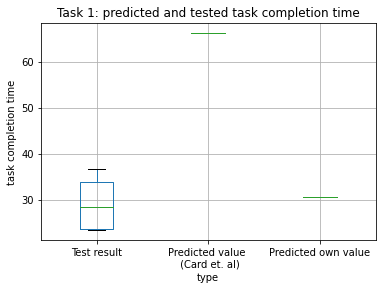

In [73]:
pred_time = [predictions_dict_lit["test1"]]
pred_time_own = [predictions_dict_own["test1"]]


df = pd.DataFrame(time_mouse_1, columns=['Test result'])
df2 = pd.DataFrame(pred_time, columns=["Predicted value \n (Card et. al)"])
df3 = pd.DataFrame(pred_time_own, columns=["Predicted own value"])


cdf = pd.concat([df, df2, df3])    


boxplot_1 = cdf.boxplot()
boxplot_1.set(xlabel="type", ylabel="task completion time")
plt.title("Task 1: predicted and tested task completion time")

### Boxplot Task 2

Text(0.5, 1.0, 'Task 2: predicted and tested task completion time')

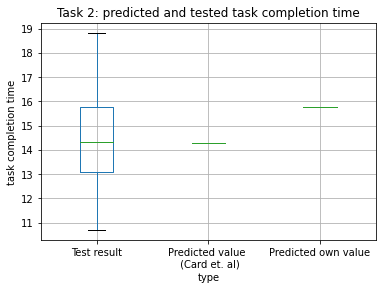

In [74]:
pred_time_2 = [predictions_dict_lit["test2"]]
pred_time_own_2 = [predictions_dict_own["test2"]]


df = pd.DataFrame(time_key_1, columns=['Test result'])
df2 = pd.DataFrame(pred_time_2, columns=["Predicted value \n (Card et. al)"])
df3 = pd.DataFrame(pred_time_own_2, columns=["Predicted own value"])


cdf = pd.concat([df, df2, df3])    


boxplot_1 = cdf.boxplot()
boxplot_1.set(xlabel="type", ylabel="task completion time")
plt.title("Task 2: predicted and tested task completion time")

### Boxplot Task 3

Text(0.5, 1.0, 'Task 3: predicted and tested task completion time')

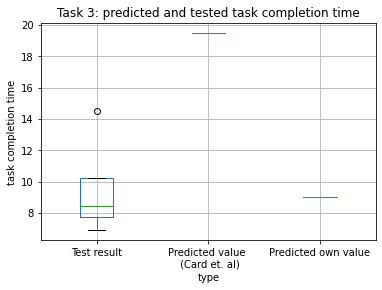

In [75]:
pred_time_3 = [predictions_dict_lit["test3"]]
pred_time_own_3 = [predictions_dict_own["test3"]]


df = pd.DataFrame(time_mouse_2, columns=['Test result'])
df2 = pd.DataFrame(pred_time_3, columns=["Predicted value \n (Card et. al)"])
df3 = pd.DataFrame(pred_time_own_3, columns=["Predicted own value"])


cdf = pd.concat([df, df2, df3])    


boxplot_1 = cdf.boxplot()
boxplot_1.set(xlabel="type", ylabel="task completion time")
plt.title("Task 3: predicted and tested task completion time")

### Boxplot Task 4

Text(0.5, 1.0, 'Task 4: predicted and tested task completion time')

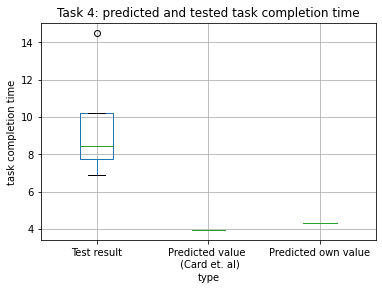

In [76]:
pred_time_4 = [predictions_dict_lit["test4"]]
pred_time_own_4 = [predictions_dict_own["test4"]]


df = pd.DataFrame(time_mouse_2, columns=['Test result'])
df2 = pd.DataFrame(pred_time_4, columns=["Predicted value \n (Card et. al)"])
df3 = pd.DataFrame(pred_time_own_4, columns=["Predicted own value"])


cdf = pd.concat([df, df2, df3])    


boxplot_1 = cdf.boxplot()
boxplot_1.set(xlabel="type", ylabel="task completion time")
plt.title("Task 4: predicted and tested task completion time")